Data Loading and Preprocessing

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
url = 'breast-cancer.csv'  # Replace with actual path
df = pd.read_csv(url)

# Show first 5 rows of the dataset
print(df.head())

   Unnamed: 0                 Class    Age Menopause Tumor-size Inv-nodes  \
0           0  no-recurrence-events  30-39   premeno      30-34       0-2   
1           1  no-recurrence-events  40-49   premeno      20-24       0-2   
2           2  no-recurrence-events  40-49   premeno      20-24       0-2   
3           3  no-recurrence-events  60-69      ge40      15-19       0-2   
4           4  no-recurrence-events  40-49   premeno        0-4       0-2   

  Node-caps  Deg-malig Breast Breast-quad Irradiat  
0        no          3   left    left_low       no  
1        no          2  right    right_up       no  
2        no          2   left    left_low       no  
3        no          2  right     left_up       no  
4        no          2  right   right_low       no  


Data Preprocessing and Feature Engineering

In [55]:
# Convert Age column to numerical by taking the mean of the range
def convert_age_to_numeric(age_range):
    start_age, end_age = age_range.split('-')
    return (int(start_age) + int(end_age)) / 2

df['Age'] = df['Age'].apply(convert_age_to_numeric)

# Convert Tumor-size column to numerical by taking the mean of the range
def convert_tumor_size_to_numeric(tumor_size_range):
    start_size, end_size = tumor_size_range.split('-')
    return (int(start_size) + int(end_size)) / 2

df['Tumor-size'] = df['Tumor-size'].apply(convert_tumor_size_to_numeric)

# Convert 'Inv-nodes' to numerical (assuming it's a range like 0-2)
df['Inv-nodes'] = df['Inv-nodes'].apply(lambda x: int(x.split('-')[0]))

# Now scale the numerical columns
numerical_cols = ['Age', 'Tumor-size', 'Inv-nodes', 'Deg-malig']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify that the preprocessing worked
print(df.head())

   Unnamed: 0  Class       Age  Menopause  Tumor-size  Inv-nodes  Node-caps  \
0           0      0 -1.647779          2    0.532232  -0.456613          1   
1           1      0 -0.657727          2   -0.419132  -0.456613          1   
2           2      0 -0.657727          2   -0.419132  -0.456613          1   
3           3      0  1.322377          0   -0.894814  -0.456613          1   
4           4      0 -0.657727          2   -2.321860  -0.456613          1   

   Deg-malig  Breast  Breast-quad  Irradiat  
0   1.290564       0            2         0  
1  -0.066426       1            5         0  
2  -0.066426       0            2         0  
3  -0.066426       1            3         0  
4  -0.066426       1            4         0  


Exploratory Data Analysis (EDA)

       Unnamed: 0       Class           Age   Menopause    Tumor-size  \
count    286.0000  286.000000  2.860000e+02  286.000000  2.860000e+02   
mean     142.5000    0.297203 -3.353960e-16    1.073427 -1.366428e-16   
std       82.7053    0.457828  1.001753e+00    0.986680  1.001753e+00   
min        0.0000    0.000000 -2.637831e+00    0.000000 -2.321860e+00   
25%       71.2500    0.000000 -6.577269e-01    0.000000 -4.191324e-01   
50%      142.5000    0.000000  3.323252e-01    2.000000  5.654960e-02   
75%      213.7500    1.000000  3.323252e-01    2.000000  5.322316e-01   
max      285.0000    1.000000  2.312429e+00    2.000000  2.434959e+00   

          Inv-nodes   Node-caps     Deg-malig      Breast  Breast-quad  \
count  2.860000e+02  286.000000  2.860000e+02  286.000000   286.000000   
mean   4.968830e-17    1.167832  2.484415e-16    0.468531     2.772727   
std    1.001753e+00    0.443052  1.001753e+00    0.499883     1.099006   
min   -4.566131e-01    0.000000 -1.423416e+00 

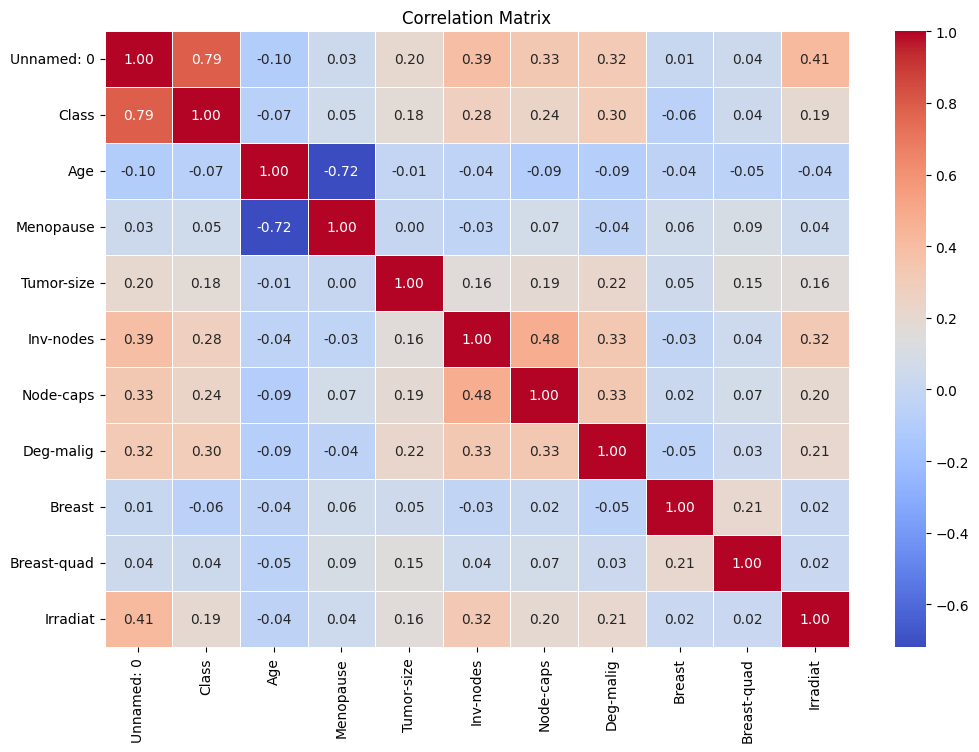

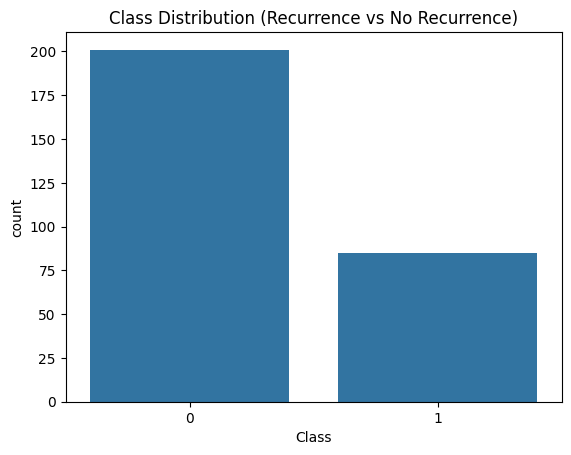

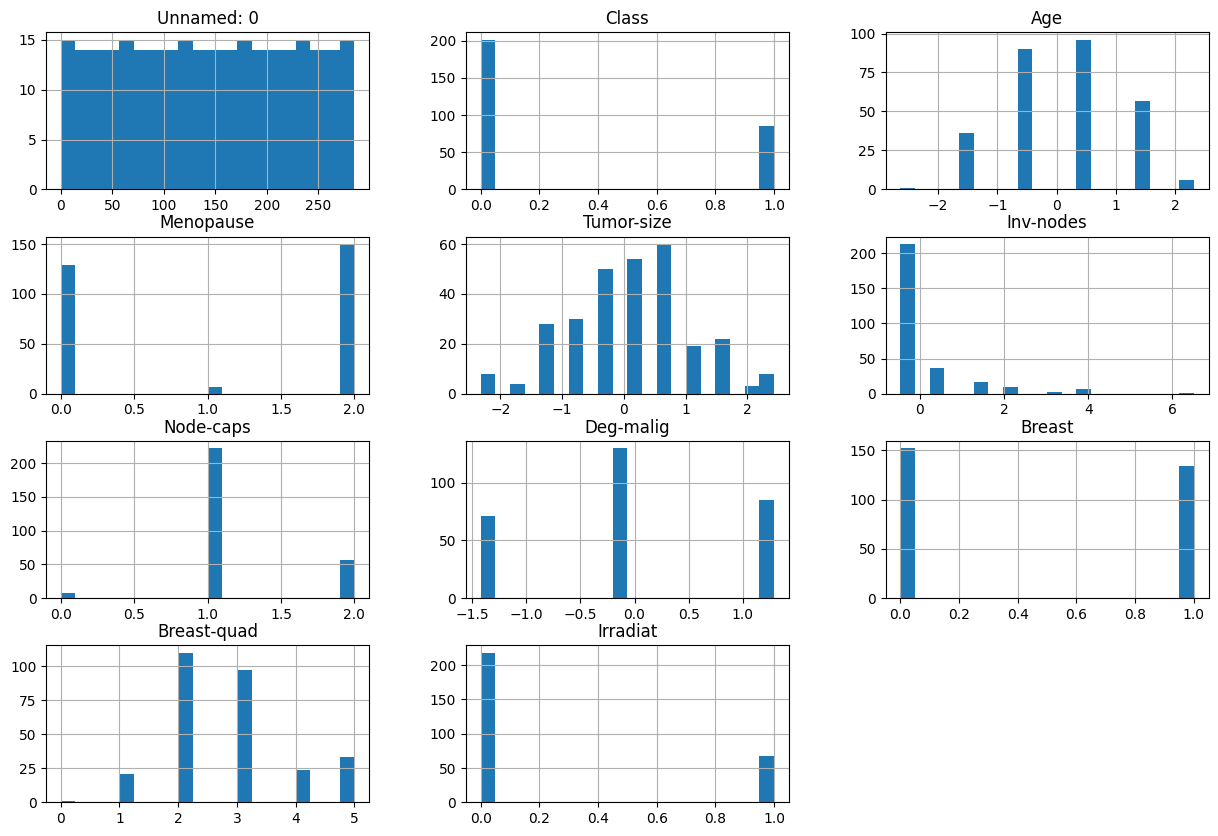

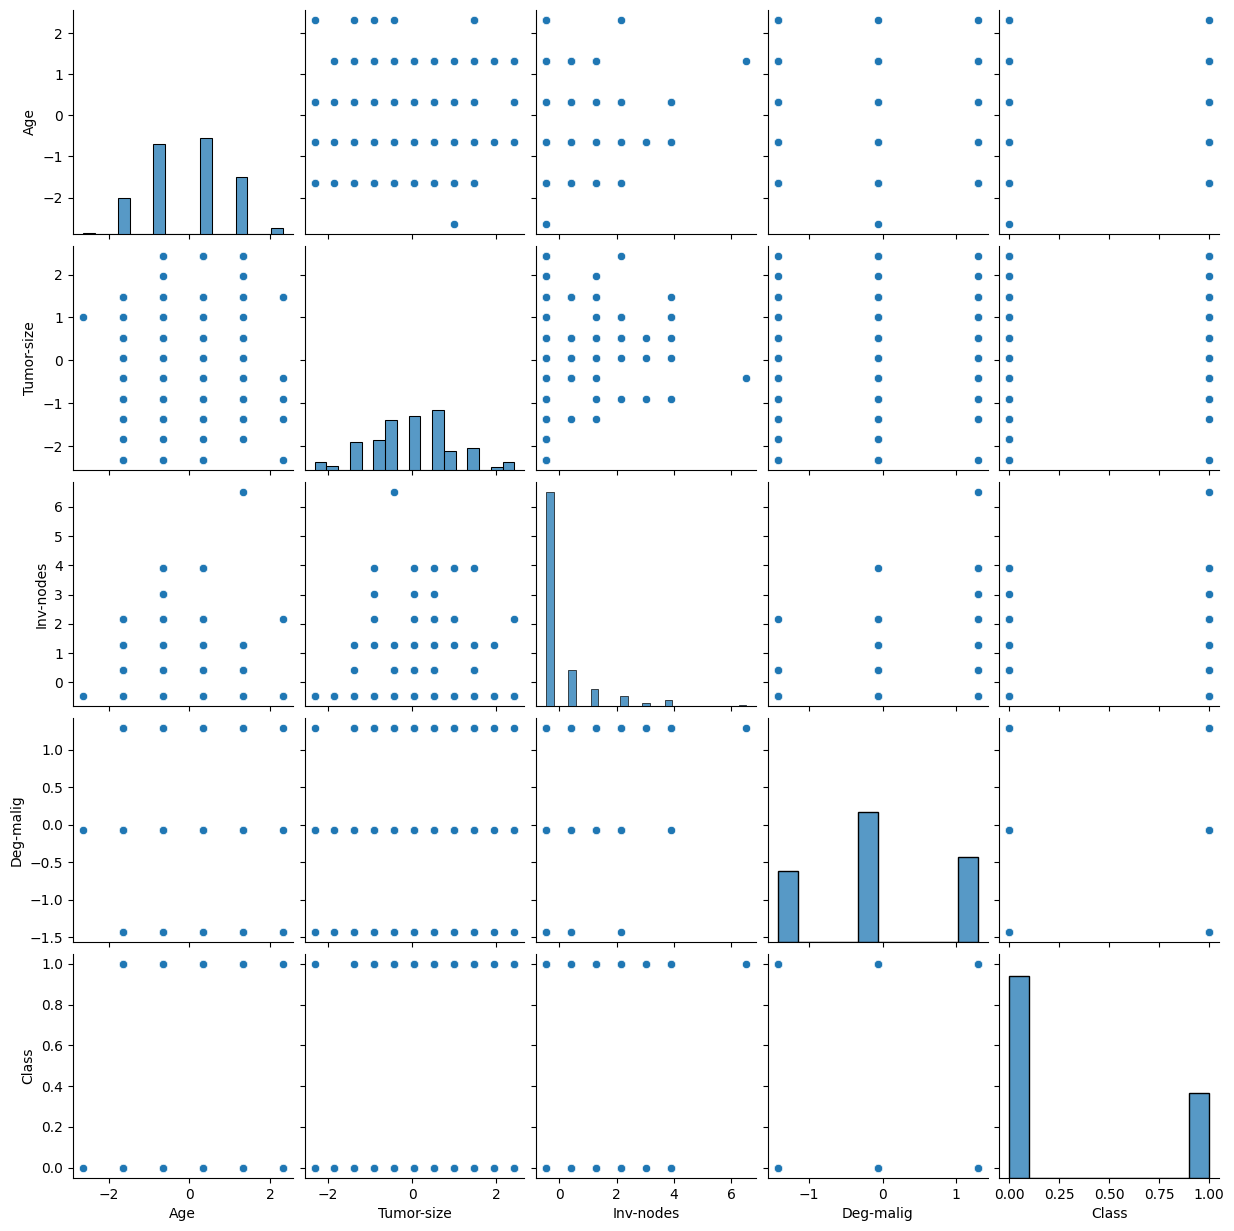

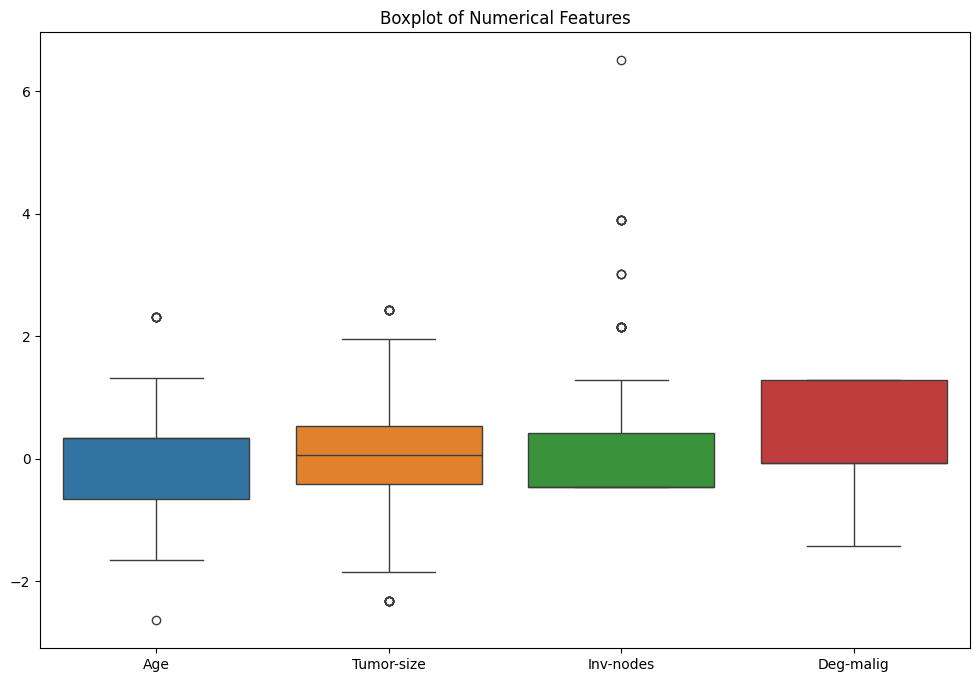

In [56]:
# Summary statistics for numerical columns
print(df.describe())

# Correlation matrix to identify relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize distribution of target variable (Class)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Recurrence vs No Recurrence)')
plt.show()

# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_cols + ['Class']])
plt.show()

# Boxplot for visualizing outliers in numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.show()

Data Splitting (Training & Testing Set)

In [57]:
# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression (Traditional Statistical Model)

In [59]:
# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])  # Encode Class

# Encode other categorical columns if necessary
categorical_cols = ['Menopause', 'Node-caps', 'Breast', 'Breast-quad', 'Irradiat']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Handle missing values by imputing with the mode for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Split data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
# Drop rows with missing values
df = df.dropna()

# Split the data again after removing missing values
X = df.drop('Class', axis=1)  # Features (excluding 'Class' as target)
y = df['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Confusion Matrix:
[[37  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [62]:
# Fill missing values with the mean of each column (numerical columns only)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 1.0
Confusion Matrix:
[[37  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Decision Tree (Machine Learning Model)

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate Decision Tree
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dtree)}')
print(classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Random Forest (Machine Learning Model)

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Hybrid Model: Voting Classifier (Combining Logistic Regression, Decision Tree, and Random Forest)

In [65]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier that combines all three models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dtree', dtree),
    ('rf', rf)
], voting='hard')

# Train Hybrid Model (Voting Classifier)
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate Hybrid Model
print(f'Hybrid Model Accuracy: {accuracy_score(y_test, y_pred_voting)}')
print(classification_report(y_test, y_pred_voting))

Hybrid Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Feature Importance (Random Forest)

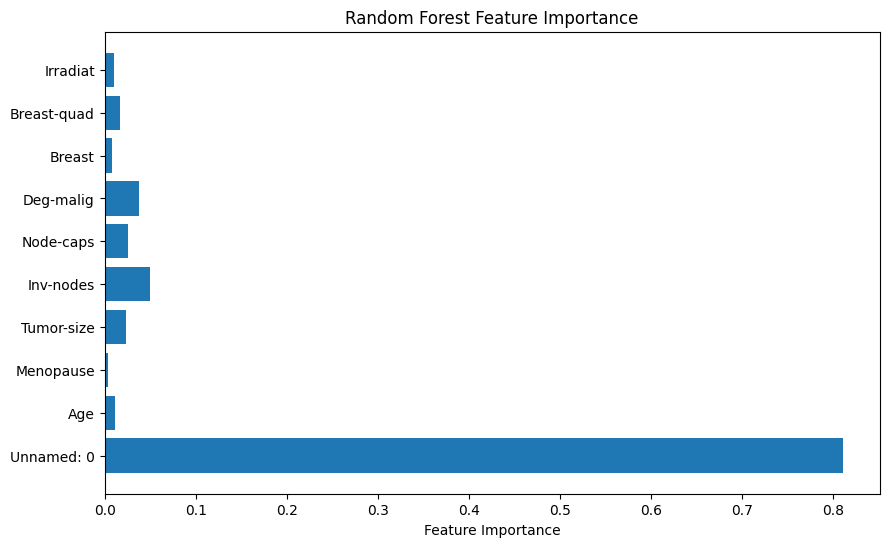

In [66]:
# Feature importance from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Cross-Validation to Assess Model Robustness

In [67]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5)
print(f'Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean():.4f} ± {cv_scores_log_reg.std():.4f}')

# Cross-validation for Decision Tree
cv_scores_dtree = cross_val_score(dtree, X, y, cv=5)
print(f'Decision Tree Cross-Validation Accuracy: {cv_scores_dtree.mean():.4f} ± {cv_scores_dtree.std():.4f}')

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print(f'Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}')

Logistic Regression Cross-Validation Accuracy: 0.9022 ± 0.1374
Decision Tree Cross-Validation Accuracy: 0.8988 ± 0.1385
Random Forest Cross-Validation Accuracy: 0.8988 ± 0.1385


Hyperparameter Tuning Using GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Display the best parameters
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')

# Evaluate the tuned model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f'Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')
print(classification_report(y_test, y_pred_best_rf))

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Support Vector Machine (SVM)

SVM Accuracy: 0.9827586206896551
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.98        21

    accuracy                           0.98        58
   macro avg       0.98      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



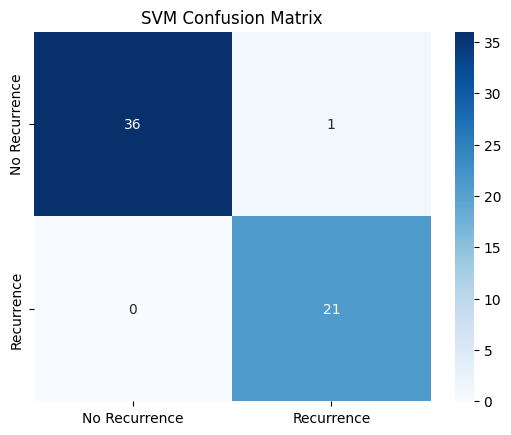

In [70]:
from sklearn.svm import SVC

# Initialize and train Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('SVM Confusion Matrix')
plt.show()

K-Nearest Neighbors (KNN)

KNN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



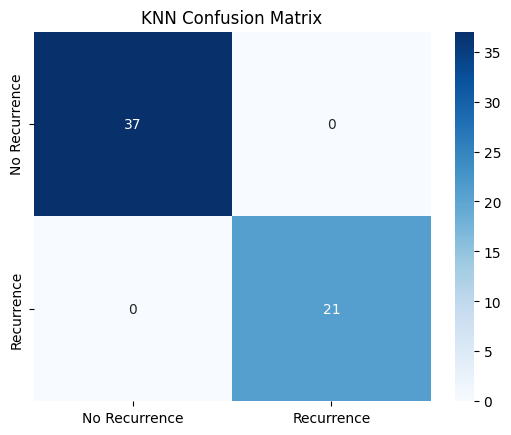

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('KNN Confusion Matrix')
plt.show()

Principal Component Analysis (PCA) for Dimensionality Reduction

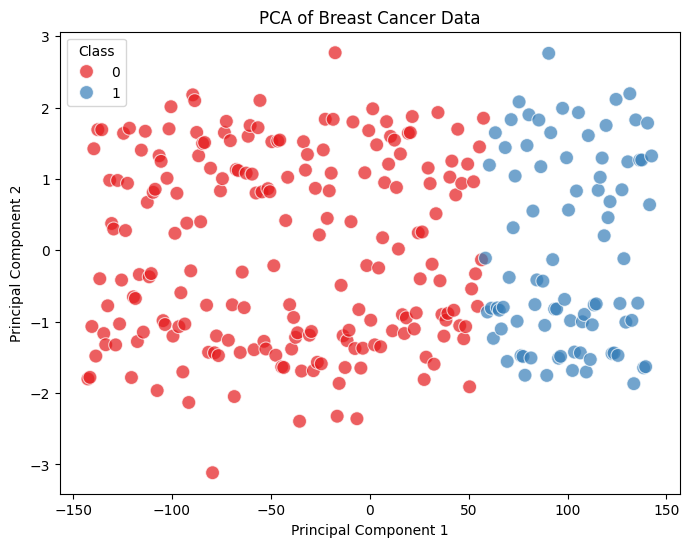

In [75]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizing the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=100, alpha=0.7)
plt.title('PCA of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='best')
plt.show()

Stratified Cross-Validation for Model Performance

In [76]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold Cross-Validation for balanced class distribution
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train and evaluate models (example for Random Forest)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
    print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9827586206896551
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.94      0.97        17

    accuracy                           0.98        58
   macro avg       0.99      0.97      0.98        58
weighted avg       0.98      0.98      0.98        58

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        17

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        17

    accuracy                           1.00        57
   macro avg       1.00      

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have your dataset (X, y)
# Example dataset:
# X, y = load_your_data()  # Your features and target data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LogisticRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Hybrid Model: Voting Classifier (Logistic Regression, Decision Tree, Random Forest)
hybrid_model = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('rf', rf)], voting='hard')
hybrid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

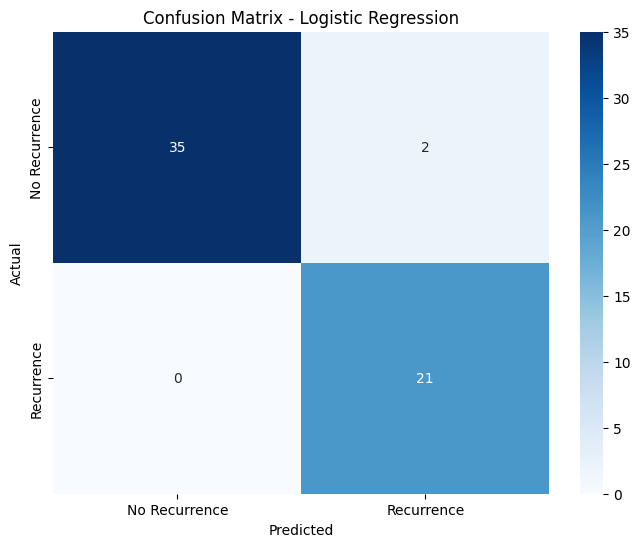

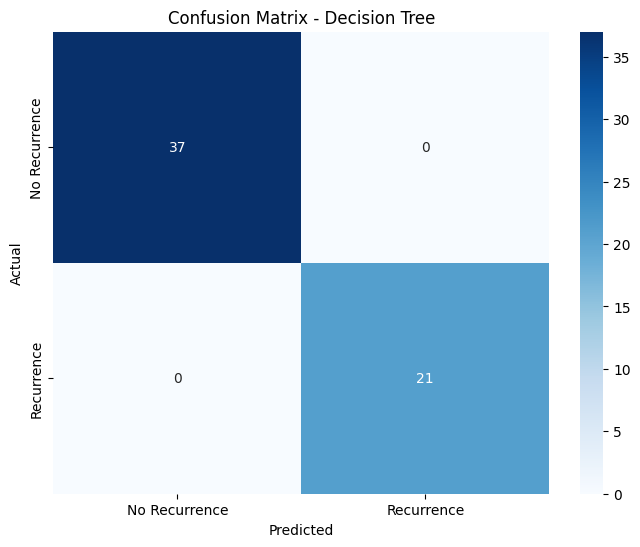

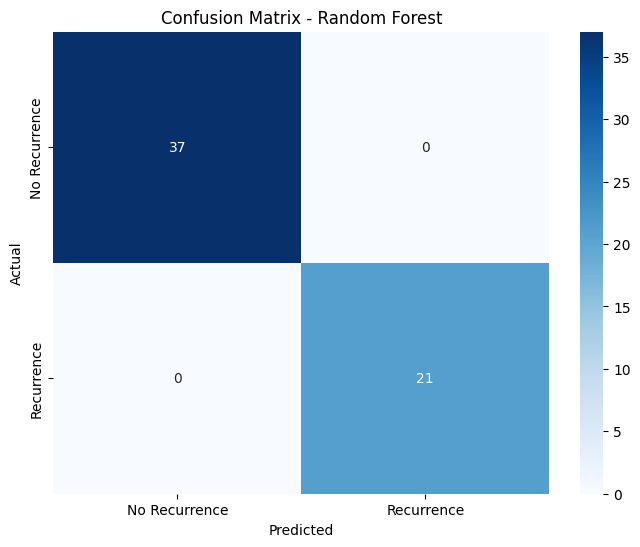

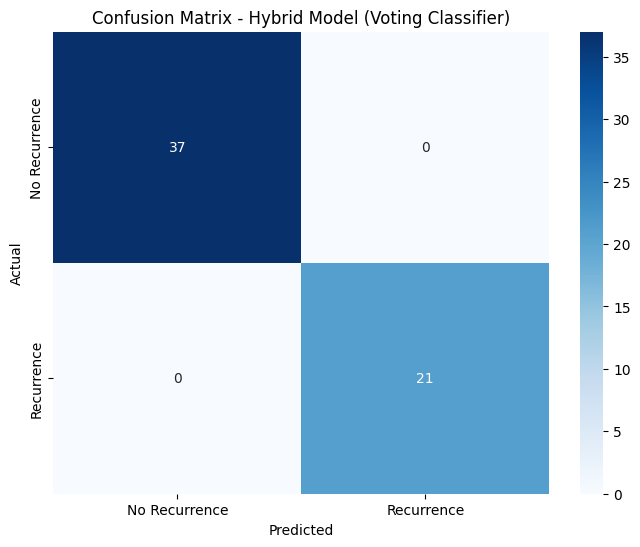

In [86]:
# Confusion Matrix for Logistic Regression
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Hybrid Model
y_pred_hybrid = hybrid_model.predict(X_test)
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix - Hybrid Model (Voting Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

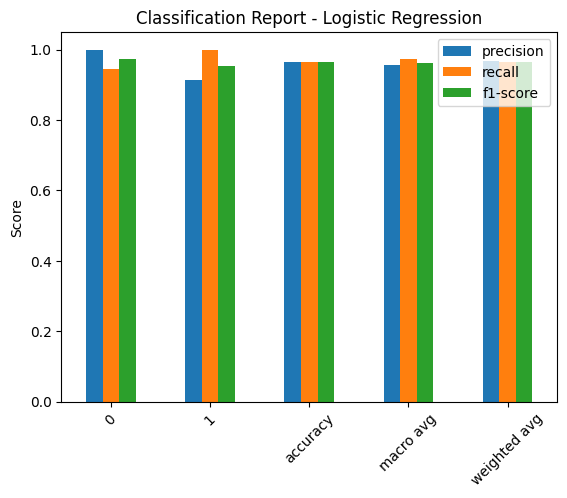

<Figure size 1000x600 with 0 Axes>

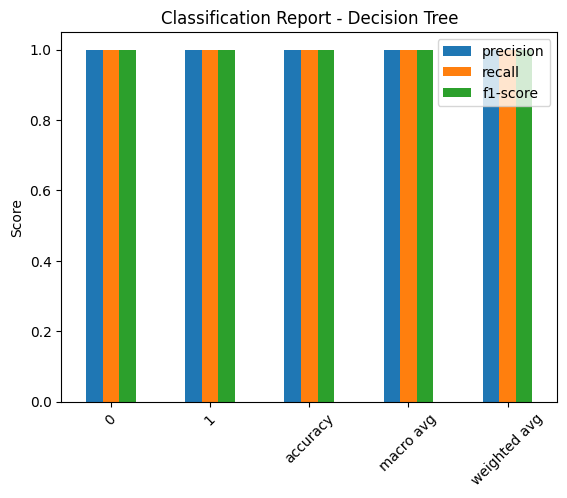

<Figure size 1000x600 with 0 Axes>

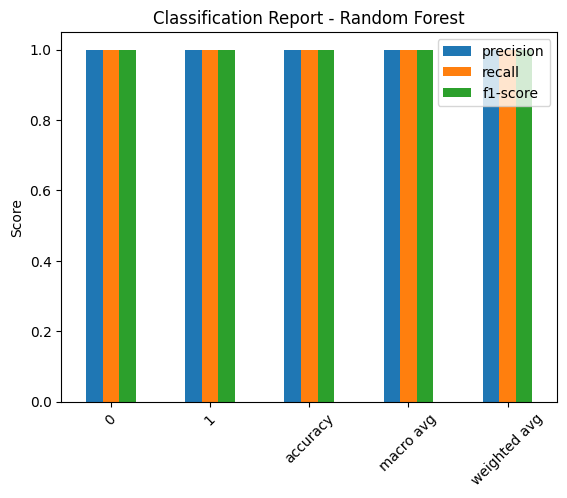

<Figure size 1000x600 with 0 Axes>

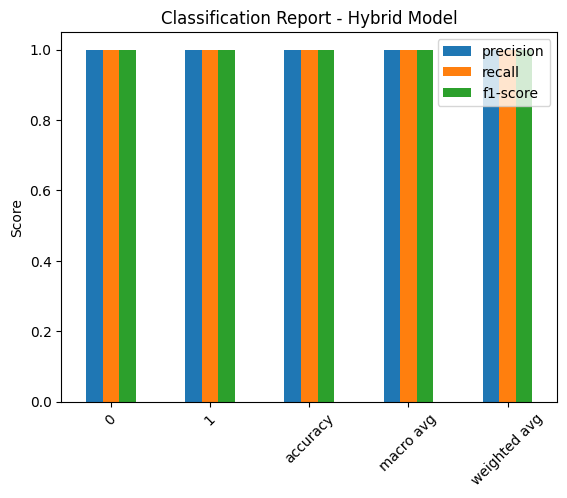

In [87]:
# Get classification reports for each model
cr_lr = classification_report(y_test, y_pred_lr, output_dict=True)
cr_dt = classification_report(y_test, y_pred_dt, output_dict=True)
cr_rf = classification_report(y_test, y_pred_rf, output_dict=True)
cr_hybrid = classification_report(y_test, y_pred_hybrid, output_dict=True)

# Convert to DataFrames
df_cr_lr = pd.DataFrame(cr_lr).transpose()
df_cr_dt = pd.DataFrame(cr_dt).transpose()
df_cr_rf = pd.DataFrame(cr_rf).transpose()
df_cr_hybrid = pd.DataFrame(cr_hybrid).transpose()

# Plot Classification Report for Logistic Regression
plt.figure(figsize=(10, 6))
df_cr_lr[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report - Logistic Regression')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Plot Classification Report for Decision Tree
plt.figure(figsize=(10, 6))
df_cr_dt[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report - Decision Tree')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Plot Classification Report for Random Forest
plt.figure(figsize=(10, 6))
df_cr_rf[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report - Random Forest')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Plot Classification Report for Hybrid Model
plt.figure(figsize=(10, 6))
df_cr_hybrid[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report - Hybrid Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
